imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# from sys import argv
from pluto_lib import PlutoSDR
from scipy import signal
from time import sleep
from basicsignalnoise_welch import signal_generator

#allows plots to display in the notebook instead of another window
%matplotlib inline

Initialization

In [13]:
# configurations
rxlo = 914  # center frequency
rxfs = 40  # sampling rate in megasamples/second
RXFS = int(40 * 1e6)
rxbw = 40  # bw in MHz
buf_size = (rxfs * 1e6)/10  # 100 ms of a full second of samples
psd_len = 1024  # a power of 2 that holds spectrum obtain from welch's method
frames = 500

f = np.linspace(-(rxfs/2), (rxfs/2), psd_len)  # frequency in Hz
f = (f + rxlo) / 1e6

base_threshold = -55  # threshold signals need to meet to be considered relevant
significance_threshold = base_threshold

config = {
    'rxlo [MHz]': int(rxlo * 1e6),
    'rxfs [ms/s]': int(rxfs * 1e6),
    'rxbw [MHz]': int(rxbw * 1e6),
    'buffer size': buf_size,
    'psd length': psd_len,
    'number frames': frames,
    'base_threshold': base_threshold,
    'significance threshold': significance_threshold
}

samples = np.empty((frames, psd_len), dtype=np.float32)

This code uses threading to collect samples 

This code generates fake samples in the case a Pluto SDR is not available in order to still demonstrate how information is saved

In [18]:
_, iq_data = signal_generator([10000000], 0.1, 40000000)
_, empty_data = signal_generator([], 0.1, 40000000)
_, psd = signal.welch(iq_data, 40000000, 'hamming', psd_len, return_onesided=False, scaling='density', average='median')
psd_dB = np.fft.fftshift(10*np.log10((np.abs(psd)/psd.shape[0])**2)) + 150  # small miscalculation I made requiring an offset to correct the graph
for i in range(frames):
    samples[i] = psd_dB
significance_threshold = 0.75 * np.max(samples[0])
print(significance_threshold)

-1.155044138431549


Generate a single spectogram

Text(0, 0.5, 'Time [sec]')

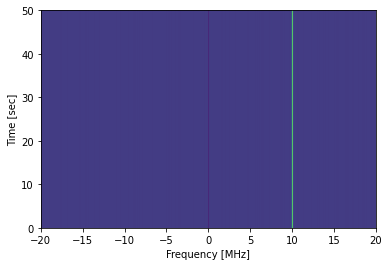

In [16]:
plt.imshow(samples, aspect='auto', extent=[-rxfs/2, rxfs/2, 0, 0.1 * frames])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Time [sec]')